# Feature Selection

In [4]:
# Veri çerçevesi oluşturmak için Pandas paketini kullanıyoruz.
import pandas as pd
# Veri kümesini ikiye bölmek ve performans ölçütlerinin hesaplanması için gerekli modüller.
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
# Grafik çizdirmek için gerekli paket.
import matplotlib.pyplot as plt
import numpy as np
#Uyarı mesajlarını kapatmak için
import warnings
warnings.filterwarnings("ignore")
# Veri çerçevelerini daha güzel görselleştirmek için
from IPython.display import display, HTML
# Veri kümesini okuyalım ve etiketleri ayıralım. Veri çerçevesindeki sütun isimlerini de değiştiriyoruz.
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
y= (df['y'] == 'yes')*1
df.drop('y', axis=1, inplace = True)

df.columns = ['yaş', 'iş', 'medeni_durum', 'eğitim', 'gecikme', 'ev', 'borç', 'iletişim', 'ay', 'haftanın_günü',
              'süre', 'kampanya', 'önceki_iletişimden_sonra_geçen_gün', 'iletişim_sayısı', 'iletişim_sonucu', 
              'işsizlik', 'tüketici_fiyat_endeksi', 'tüketici_güven_endeksi', 'euribor_faizi', 'çalışan_sayısı'] 
print(df.head())

   yaş         iş medeni_durum       eğitim  gecikme   ev borç   iletişim  \
0   56  housemaid      married     basic.4y       no   no   no  telephone   
1   57   services      married  high.school  unknown   no   no  telephone   
2   37   services      married  high.school       no  yes   no  telephone   
3   40     admin.      married     basic.6y       no   no   no  telephone   
4   56   services      married  high.school       no   no  yes  telephone   

    ay haftanın_günü  süre  kampanya  önceki_iletişimden_sonra_geçen_gün  \
0  may           mon   261         1                                 999   
1  may           mon   149         1                                 999   
2  may           mon   226         1                                 999   
3  may           mon   151         1                                 999   
4  may           mon   307         1                                 999   

   iletişim_sayısı iletişim_sonucu  işsizlik  tüketici_fiyat_endeksi  \
0       

In [5]:
print(df.isnull().sum())

yaş                                   0
iş                                    0
medeni_durum                          0
eğitim                                0
gecikme                               0
ev                                    0
borç                                  0
iletişim                              0
ay                                    0
haftanın_günü                         0
süre                                  0
kampanya                              0
önceki_iletişimden_sonra_geçen_gün    0
iletişim_sayısı                       0
iletişim_sonucu                       0
işsizlik                              0
tüketici_fiyat_endeksi                0
tüketici_güven_endeksi                0
euribor_faizi                         0
çalışan_sayısı                        0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

kategorik_sutunlar = ['iş', 'medeni_durum', 'eğitim', 'gecikme', 'ev', 'borç', 'iletişim', 'ay',
                      'haftanın_günü', 'iletişim_sonucu']

for i in kategorik_sutunlar:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
print(df.head())

   yaş  iş  medeni_durum  eğitim  gecikme  ev  borç  iletişim  ay  \
0   56   3             1       0        0   0     0         1   6   
1   57   7             1       3        1   0     0         1   6   
2   37   7             1       3        0   2     0         1   6   
3   40   0             1       1        0   0     0         1   6   
4   56   7             1       3        0   0     2         1   6   

   haftanın_günü  süre  kampanya  önceki_iletişimden_sonra_geçen_gün  \
0              1   261         1                                 999   
1              1   149         1                                 999   
2              1   226         1                                 999   
3              1   151         1                                 999   
4              1   307         1                                 999   

   iletişim_sayısı  iletişim_sonucu  işsizlik  tüketici_fiyat_endeksi  \
0                0                1       1.1                  93.994   
1     

In [7]:
df.drop('süre', inplace = True, axis=1)
df_train, df_test, y_train, y_test = train_test_split(df, y, train_size = 0.7, test_size = 0.3)

## sklearn metrics

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
model = RandomForestClassifier(n_estimators=100)
model.fit(df_train, y_train)

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, model.predict(df_train)))
print('Precision:', precision_score(y_train, model.predict(df_train)))
print('Recall:', recall_score(y_train, model.predict(df_train)))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, model.predict(df_test)))
print('Precision:', precision_score(y_test, model.predict(df_test)))
print('Recall:', recall_score(y_test, model.predict(df_test)))

Training set metrics:
Accuracy: 0.9952134854843745
Precision: 0.9922118380062306
Recall: 0.9657368101879927
Test set metrics:
Accuracy: 0.8953629521728574
Precision: 0.5307402760351317
Recall: 0.3152011922503726


### top feature importances

In [10]:
col_sorted_by_importance=model.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':df.columns[col_sorted_by_importance],
    'imps':model.feature_importances_[col_sorted_by_importance]
})


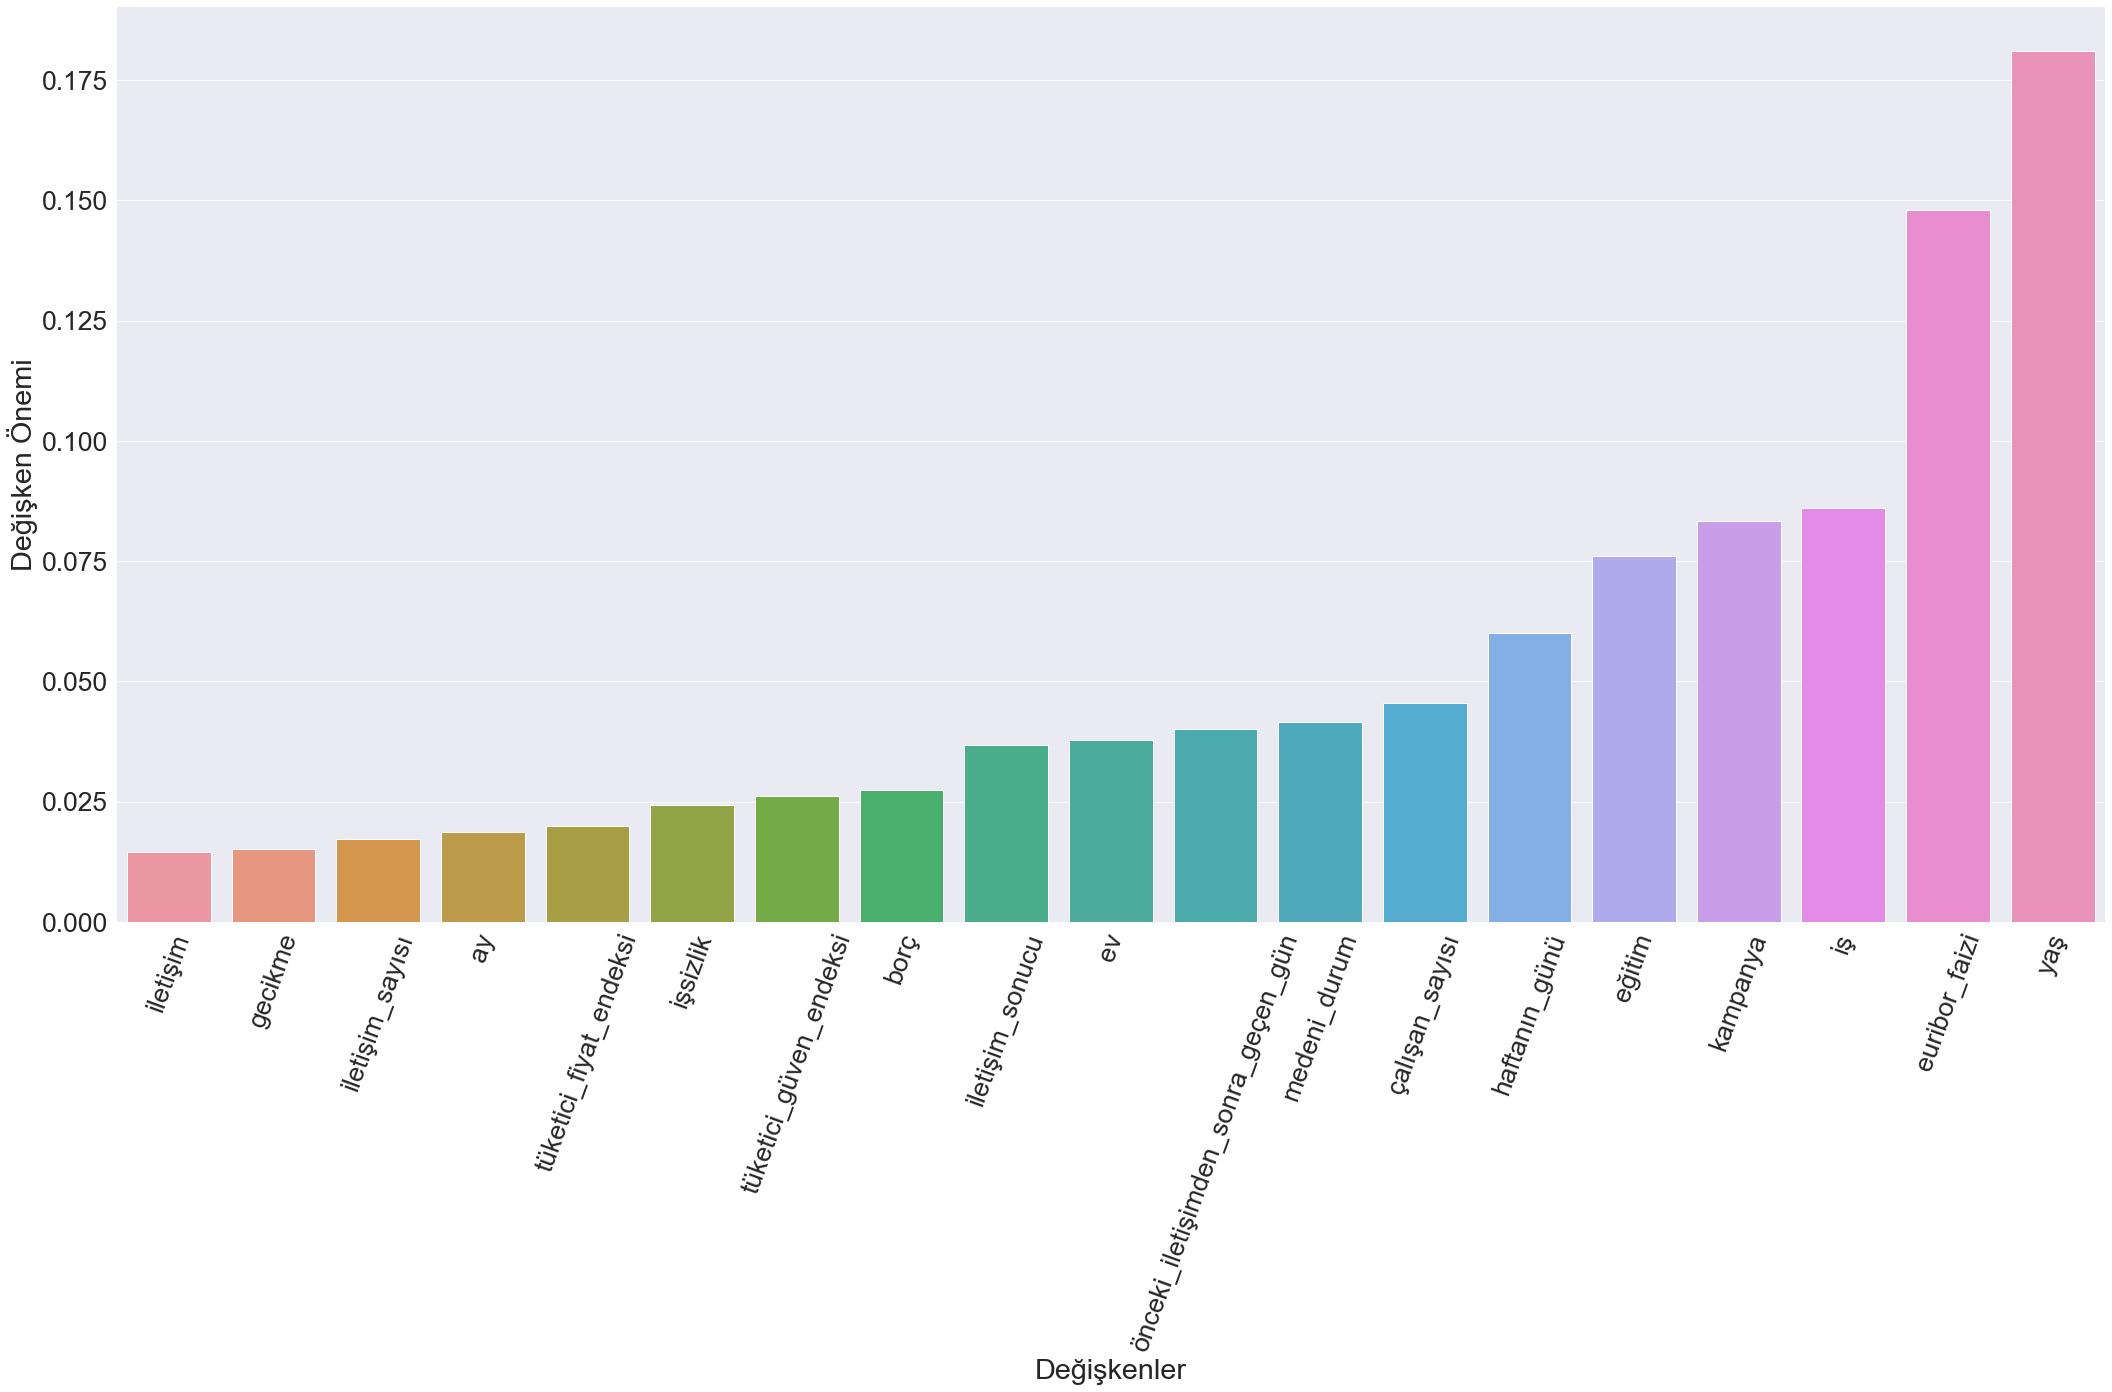

In [24]:
import seaborn as sns
ax= sns.barplot(x="cols", y="imps", data=feat_imp, linewidth = 1)
sns.set(rc={'figure.figsize':(30,20)})
sns.set_context("paper", font_scale=3)  
ax.set_ylabel('Değişken Önemi') 
ax.set_xlabel('Değişkenler') 
plt.xticks(rotation=70)                                                               
plt.tight_layout()                                                                    
ax.yaxis.grid(True, clip_on=False)                                                 
sns.despine(left=True, bottom=True)                                                   
plt.savefig('test.pdf', bbox_inches='tight') 

In [34]:
df['yaş'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

## Permutation feature importance

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random
import progressbar

In [14]:
def PermImportance(X, y, clf, metric, num_iterations=100):
    '''
    Veri kümesindeki değişkenlerin permütasyon önemini hesaplar.
    Girdiler:
    X: Bütün değişkenlere sahip dataframe
    y: Bağımlı Değişken 
    clf: sklearn sınıflandırıcı
    metric: sklearn metrik, accuracy_score, precision_score or recall_score gibi
    num_iterations: permütasyonun iterasyon sayısı
    Çıktılar:
    baseline: taban metriği
    scores: her bir özelliğin permütasyonundan kaynaklanan temel metrikteki farklar {feature:[diffs]}
    '''
    bar=progressbar.ProgressBar(maxval=len(df.columns)).start()
    baseline_metric=metric(y, clf.predict(df))
    scores={c:[] for c in df.columns}
    for c in df.columns:
        X1=df.copy(deep=True)
        for _ in range(num_iterations):
            temp=X1[c].tolist()
            random.shuffle(temp)
            X1[c]=temp
            score=metric(y, clf.predict(X1))
            scores[c].append(baseline_metric-score)
        bar.update(df.columns.tolist().index(c))
    return baseline_metric, scores

In [15]:
baseline, scores=PermImportance(df_test, y_test, model, recall_score, num_iterations=100)

In [16]:
percent_changes={c:[] for c in df.columns}
for c in scores:
    for i in range(len(scores[c])):
        percent_changes[c].append(scores[c][i]/baseline*100)

In [32]:
permuting = pd.DataFrame.from_dict(percent_changes).melt().groupby(['variable']).mean().reset_index().sort_values(['value'], ascending=False)[:25]

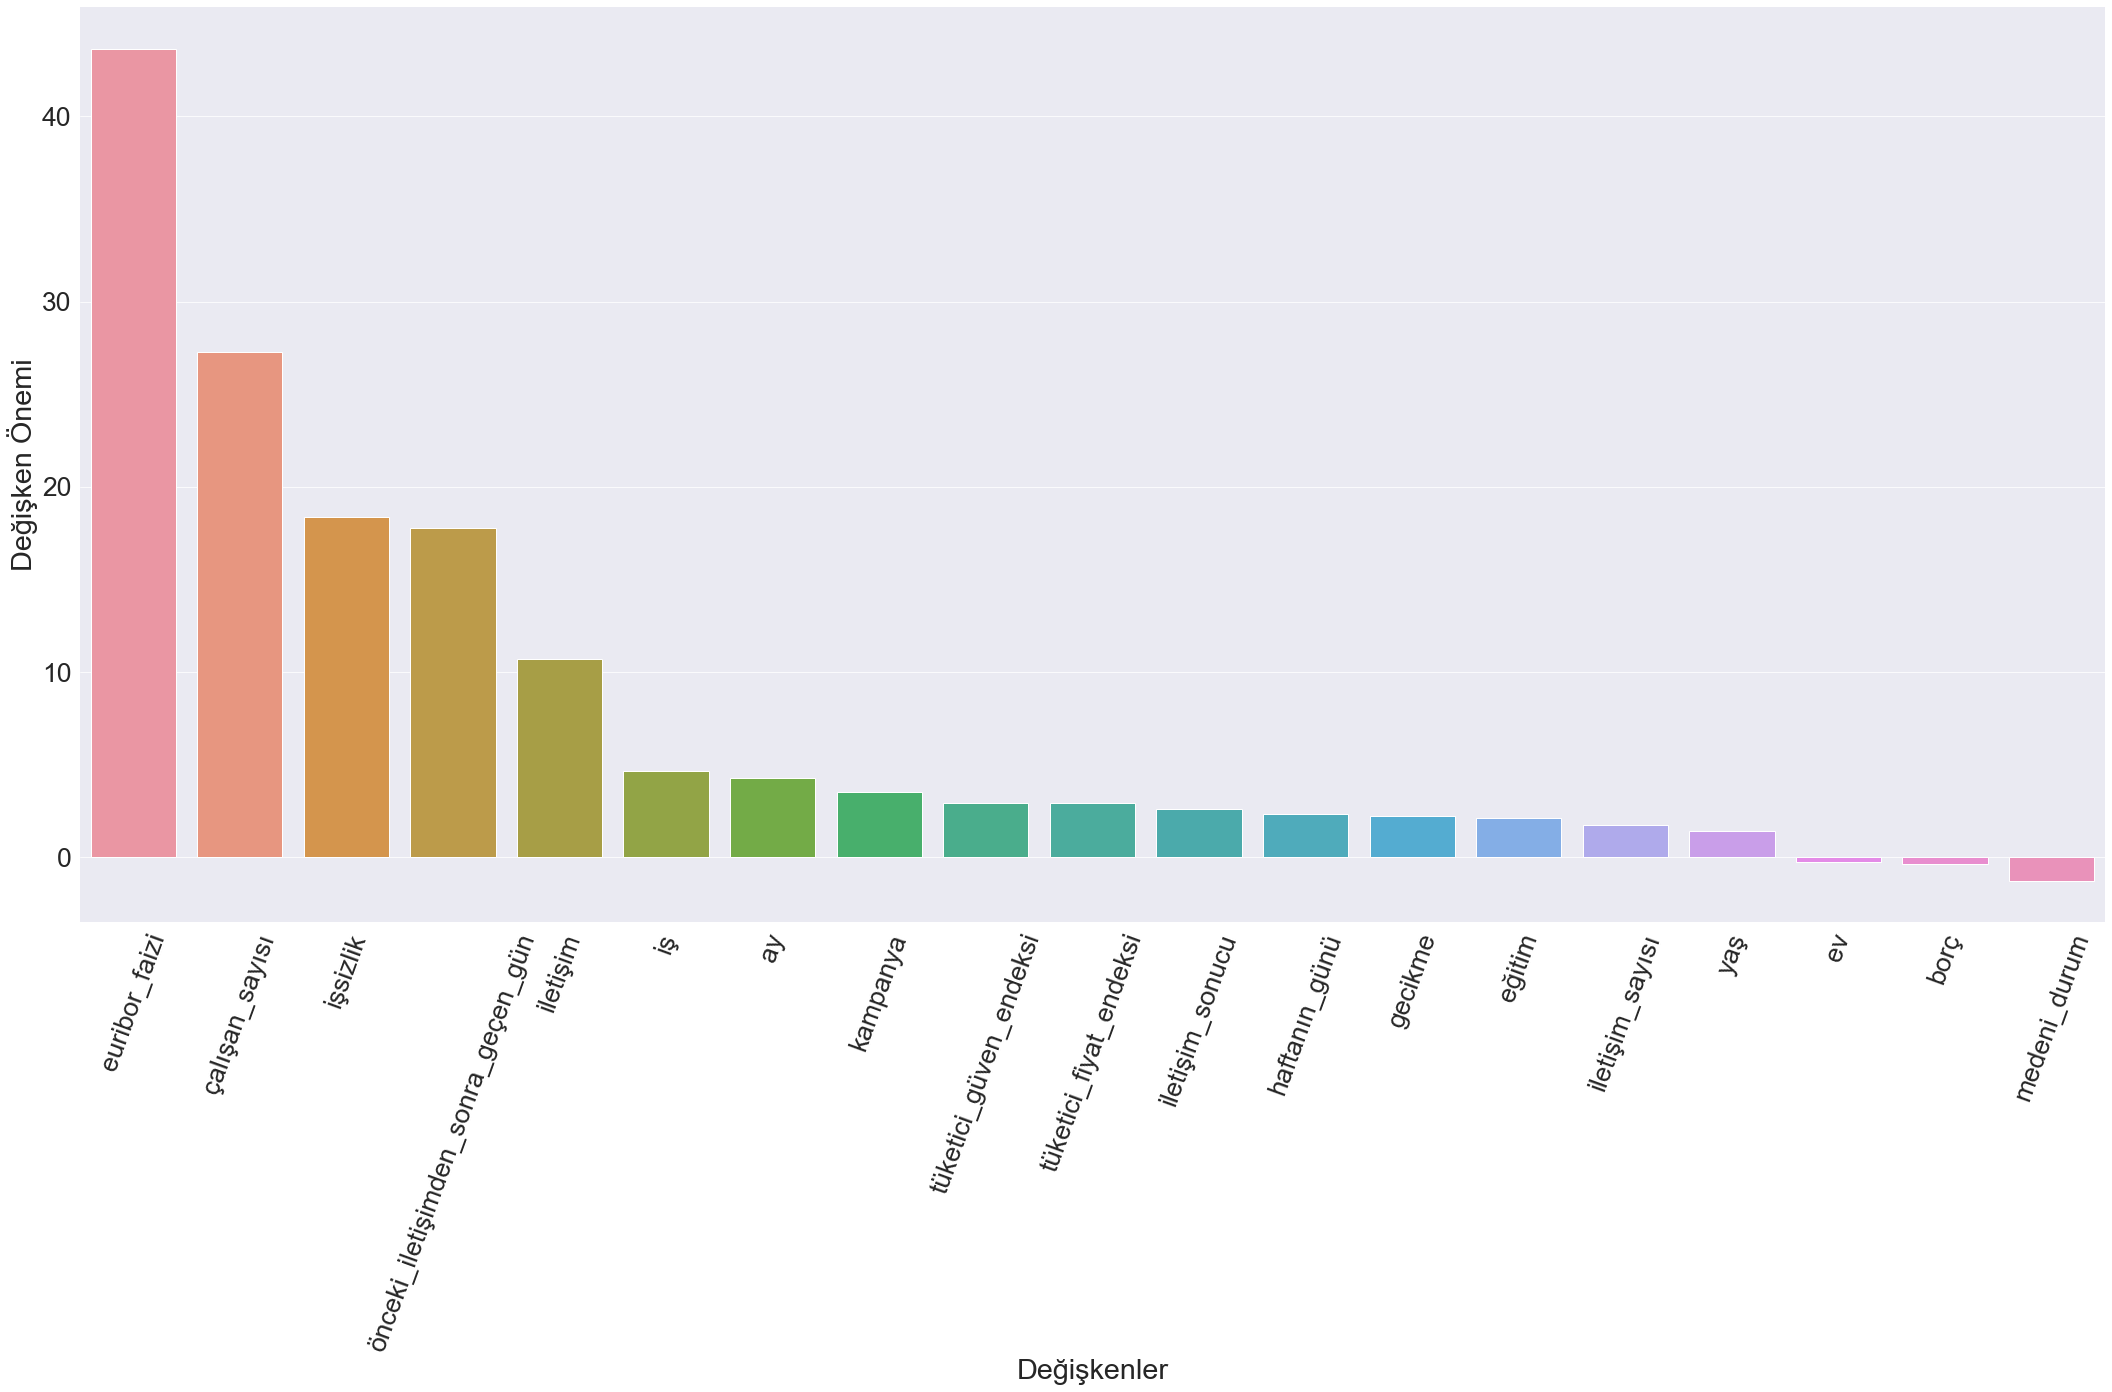

In [33]:
import seaborn as sns
ax= sns.barplot(x="variable", y="value", data=permuting, linewidth = 1)
sns.set(rc={'figure.figsize':(30,20)})
sns.set_context("paper", font_scale=3)  
ax.set_ylabel('Değişken Önemi') 
ax.set_xlabel('Değişkenler') 
plt.xticks(rotation=70)                                                               
plt.tight_layout()                                                                    
ax.yaxis.grid(True, clip_on=False)                                                 
sns.despine(left=True, bottom=True)                                                   
plt.savefig('test.pdf', bbox_inches='tight') 